In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#https://gist.github.com/tonicebrian/4018084

In [3]:
df=pd.read_csv("data_regression.csv")

In [4]:
y= df['Price']
X = df.drop(['Price'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor().fit(X_train, y_train)

In [26]:
clf.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)>

In [19]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250]}

In [24]:
rmse = np.sqrt(mean_squared_error(y_test,clf.predict(X_test)))
rmse

328474.20397842064

In [21]:
error_depth = []
#for d in p_test3['learning_rate']:
for d in p_test3['n_estimators']:
    print(d)
    rf_best = GradientBoostingRegressor(n_estimators= d )  #For learning_rate
    #rf_best = RandomForestRegressor(random_state = 42,n_estimators = d )  #For n_estimators
    rf_best.fit(X_train, y_train)
    predictions_best=rf_best.predict(X_test)
    error_depth.append( np.sqrt(mean_squared_error(y_test,rf_best.predict(X_test))))
    

100
250
500
750
1000
1250


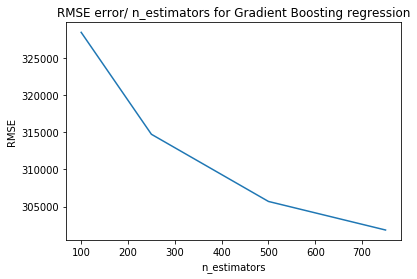

In [18]:
ax = plt.gca()
ax.plot( p_test3['n_estimators'], error_depth)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE error/ n_estimators for Gradient Boosting regression')
plt.axis('tight')
plt.savefig('Images/RMSE-nest-GBM.png')
plt.show()

Para Tuning

In [22]:
from sklearn.grid_search import GridSearchCV
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01], 'n_estimators':[100,250,500,750]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='explained_variance',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

c:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: 0.75546, std: 0.02305, params: {'learning_rate': 0.15, 'n_estimators': 100},
  mean: 0.77466, std: 0.02419, params: {'learning_rate': 0.15, 'n_estimators': 250},
  mean: 0.78306, std: 0.02399, params: {'learning_rate': 0.15, 'n_estimators': 500},
  mean: 0.78489, std: 0.02524, params: {'learning_rate': 0.15, 'n_estimators': 750},
  mean: 0.74685, std: 0.02173, params: {'learning_rate': 0.1, 'n_estimators': 100},
  mean: 0.77062, std: 0.02315, params: {'learning_rate': 0.1, 'n_estimators': 250},
  mean: 0.78137, std: 0.02429, params: {'learning_rate': 0.1, 'n_estimators': 500},
  mean: 0.78547, std: 0.02431, params: {'learning_rate': 0.1, 'n_estimators': 750},
  mean: 0.71437, std: 0.02029, params: {'learning_rate': 0.05, 'n_estimators': 100},
  mean: 0.75616, std: 0.02284, params: {'learning_rate': 0.05, 'n_estimators': 250},
  mean: 0.77183, std: 0.02428, params: {'learning_rate': 0.05, 'n_estimators': 500},
  mean: 0.77989, std: 0.02487, params: {'learning_rate': 0.05, 'n_est

In [32]:
#Evaluation on test set For Optimized model
#input max depth optimal value from previous chunk 
model1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=750,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
rmse = np.sqrt(mean_squared_error(y_test,model1.predict(X_test)))
print('RMSE', rmse)


RMSE 291257.119966


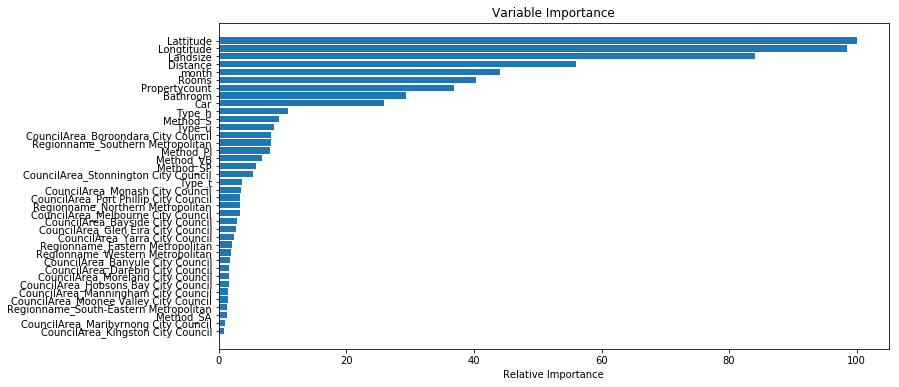

In [34]:
feature_importance = model1.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos[20:], feature_importance[sorted_idx][20:], align='center')
plt.yticks(pos[20:], X.columns[sorted_idx][20:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('Images/Var_imp_GBM.png')
plt.show()

In [7]:
import matplotlib.pyplot as plt

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
                label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
                label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

Text(0,0.5,'Loss')

In [26]:
rmse2 = np.sqrt(mean_squared_error(y_test,model1.predict(X_test)))
rmse2

291257.11996607156

In [35]:
train_sizes = [1, 100, 500, 1000, 2500, 5000]
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=750,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), X = X_train,
                                                   y = y_train, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

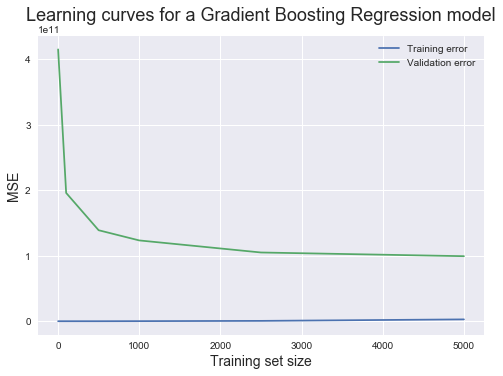

In [36]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Gradient Boosting Regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.savefig('Images\Learning_curve_GBM.png')



In [37]:
train_scores_mean

array([ -0.00000000e+00,   9.90076077e-08,   2.14445027e+02,
         1.12454526e+08,   5.12871369e+08,   2.78393629e+09])